# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федерального оператора сотовой связи своим клиентам предлагает два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В рамках данной работы предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Для этого предоставляются  данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

<h1>Содержание<span class="tocSkip"></span></h1>

1. [Изучение данных из файла](#start)
    - [импорт библиотек](#import)
    - [изучение файла](#study)
    - [вывод](#вывод1.3)
2. [Предобработка данных](#preprocessing)
    - [Обработка пропусков](#processing)
    - [Замена типа данных](#null)
    - [вывод](#output2)
3. [Расчеты и добавление результатов](#resalt)
    - [вывод](#output3)
4. [Исследовательский анализ данных](#analysis)
5. [Общий вывод](#output)
6. [Чек-лист готовности проекта](#list)

## Изучение данных из файла
<a id="start"></a>

### импорт библиотек
<a id="import"></a>

Загружаем библиотеки

In [1]:
import pandas as pd# импорт библиотеки pandas
import numpy as np #Импорт модуля numpy. numpy работает с однородными многомерными массивами (матрицами).
import pathlib #Импорт модуля pathlib. Модуль Pathlib в Python упрощает работу с файлами и папками.
from pathlib import Path
from IPython.display import display #импортируем метод display из библиотеки IPython.display
import matplotlib.pyplot as plt #Импорт модуля matplotlib
import seaborn as sns
#import math
from scipy import stats as st

### Открываем исходные данные
<a id="study"></a>

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Посмотрим на данные из Дата Фрейм - **calls**

In [3]:
display(calls.info(), calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


calls - это таблица со звонками всех пользователей. Состоит из 4 столбцов и 202607 строк. Пропущенных значений нет.
В столбце call_date нужно изменить тип данных и исследовать  duration  на нуливые значения, в условии указано, что их много и нужно принять решение что с ними делать дальше.

Посмотрим на данные из Дата Фрейм - **internet**

In [4]:
display(internet.head(5), internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

internet - это таблица с информацией об интернет-сессиях всех пользователей. Состоит из 5 столбцов и 149396 строк. Пропущенных значений нет.
В столбце session_date нужно изменить тип данных. 

Посмотрим на данные из Дата Фрейм - **messages**

In [5]:
display(messages.tail(5), messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


None

messages - это таблица с информацией об интернет-сессиях всех пользователей. Состоит из 3 столбцов и 123035 строк. Пропущенных значений нет.
В столбце message_date нужно изменить тип данных. 

Посмотрим на данные из Дата Фрейм - **tariffs**

In [6]:
display(tariffs.head(5), tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

tariffs - это таблица с информацией об интернет-сессиях всех пользователей. Состоит из 8 столбцов и 2 строк. Пропущенных значений нет.
Данная таблица - справочная информация по тарифам.

Посмотрим на данные из Дата Фрейм - **users**

In [7]:
display(users.head(5), users.info(), users.isnull().sum(), users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

0

users - это таблица с информацией о пользователях. Состоит из 8 столбцов и 500 строк. Пропущенные значения есть в churn_date и  в количестве 462. В описание к задаче сказано: "churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)". Пока оставим как есть. Для дальнейшего анализа нам эти данные не нужны.
Дубликатов не обнаружено.
В столбцах churn_date и reg_date нужно изменить тип данных.

### Вывод
<a id="вывод1.3"></a>

*Всего 5 датафреймов data:*
  - Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя,
first_name — имя пользователя,
last_name — фамилия пользователя,
age — возраст пользователя (годы),
reg_date — дата подключения тарифа (день, месяц, год),
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных),
city — город проживания пользователя,
tariff — название тарифного плана
   - Таблица calls (информация о звонках):
id — уникальный номер звонка,
call_date — дата звонка,
duration — длительность звонка в минутах,
user_id — идентификатор пользователя, сделавшего звонок
   - Таблица messages (информация о сообщениях):
id — уникальный номер сообщения,
message_date — дата сообщения,
user_id — идентификатор пользователя, отправившего сообщение
   - Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии,
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах),
session_date — дата интернет-сессии,
user_id — идентификатор пользователя
   - Таблица tariffs (информация о тарифах):
tariff_name — название тарифа,
rub_monthly_fee — ежемесячная абонентская плата в рублях,
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату,
messages_included — количество сообщений в месяц, включённых в абонентскую плату,
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах),
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата),
rub_per_message — стоимость отправки сообщения сверх тарифного пакета,
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
                                                        
Датафреймы: calls,  internet, tariffs, messages не содержат пропусков.  В таблице users выявлены пропуски в столбце  churn_date. Это связано с тем, что на данный момент абонент продолжает оставаться пользователем оператора "Мегафон".

Присутствуют столбцы тип данных которых надо менять на другой тип: нужно менять типы данных в датах, вещественный тип в звонках, потреблении интернета и кл-ве смс переведем в целочисленный. В соответствии требования оператора округлить длительность звонка и потребление интернета до целого большего.


## Предобработка данных
<a id="preprocessing"></a>

###  Замена типа данных
<a id='processing'></a>

Проведем в столбцах замену типа данных.

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')# замена  типа данных на времянной 
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')                                       
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
#calls_all['user_id']=calls_all['user_id'].astype('int32')
users['age']=users['age'].astype('int16')

Из условия нам известно, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Округлим до целой минуты входные данные по телефонным звонкам и потраченным мегабайтам.

In [9]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int32')

calls['user_id']=calls['user_id'].astype('int32')

Посмотрим на гистограмму длительности звонков.

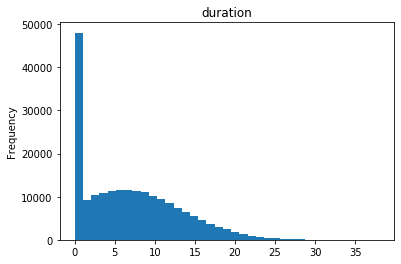

In [10]:
calls['duration'].plot(kind='hist', y='duration', bins=37, title = 'duration')

Сделаем срез таблицы по нулевым значениям звонков.

In [11]:
calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
9,1000_9,2018-08-15,0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499


Из таблицы видно, что звонки длительностью разговора ноль минут есть у различных абонентов, в разные периоды времени. Скорее всего это или когда у другого абонента было занято, или никто не ответил на входящий.
Эти нули несут информативное значение о количестве сделанных звонков пользователем. Однако, при этом они не оказывают влияния на расход  лимитированных минут разговора и не влияют на выручку оператора.

Удалим эти лишние данные и вновь построим гистограмму.

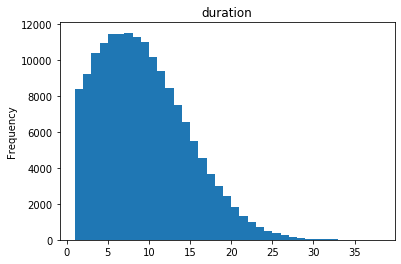

In [12]:
calls = calls[calls["duration"] > 0]#отсортируем таблицу по столбцу duration с условием больше ноля и перезапишем calls дату фрейм с новым результатом
calls['duration'].plot(kind='hist', y='duration', bins=37, title = 'duration')#проверяем, строим гистограмму

Заменяем тип данные в столбце user_id. Удаляем столбец Unnamed: 0' и проверяем результат.

In [13]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int32')

internet['user_id']=internet['user_id'].astype('int32')
del internet['Unnamed: 0']
internet.head(5)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int32
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int32
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 3.4+ MB


Строим гистограмму для дата фрейм internet.

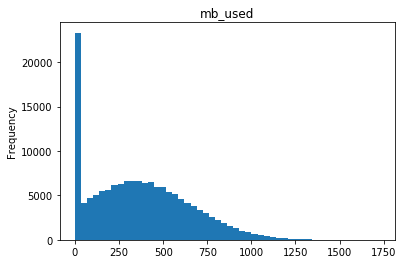

In [14]:
internet['mb_used'].plot(kind='hist', y='mb_used', bins=50, title = 'mb_used')

In [15]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id
11,1000_11,0,2018-08-28,1000
38,1000_38,0,2018-11-27,1000
46,1000_46,0,2018-06-30,1000
67,1000_67,0,2018-06-16,1000
72,1000_72,0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0,2018-12-11,1499
149381,1499_142,0,2018-11-01,1499
149383,1499_144,0,2018-11-27,1499
149386,1499_147,0,2018-10-21,1499


Из таблицы видно, что выход в интернет длительностью ноль минут есть у различных абонентов, в разные периоды времени. Скорее всего это был  осуществлен выход в интернет, но объём потраченного за сессию интернет-трафика (в мегабайтах) равен нулю.
Эти нули несут информативное значение о количестве выходов в интернет. В тоже время они не отражаются на получение прибыли оператором и на суммарном потраченном трафике, поэтому убираем их из рассмотрения.

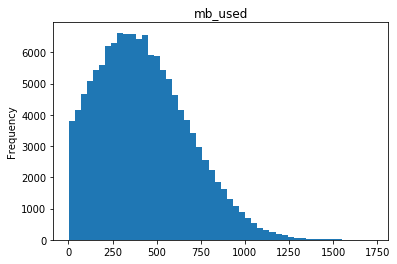

In [16]:
internet = internet[internet["mb_used"] > 0]#отсортируем таблицу по столбцу duration с условием больше ноля и перезапишем calls дату фрейм с новым результатом
internet['mb_used'].plot(kind='hist', y='mb_used', bins=50, title = 'mb_used')#проверяем, строим гистограмму

Добавим в даты фреймы calls, messages, internet и users столбцы с месяцами. Они нам в дальшейшем потребуются для работы

In [17]:
calls['month'] = calls['call_date'].dt.month

In [18]:
messages['month'] = messages['message_date'].dt.month

In [19]:
internet['month'] = internet['session_date'].dt.month

In [20]:
users['month'] = users['reg_date'].dt.month

* количество сделанных звонков и израсходованных минут разговора по месяцам

In [21]:
calls_group=calls.pivot_table(index=['month', 'user_id'],values='duration',aggfunc=('count', 'sum'))

calls_group

count   sum
month user_id             
1     1005        11    95
      1032        44   380
      1045         1     9
      1055        47   551
      1071        18   194
...              ...   ...
12    1494        54   418
      1495       120  1031
      1496        65   518
      1497        58   545
      1499        56   492

[3168 rows x 2 columns]

Text(0, 0.5, 'Количество звонков')

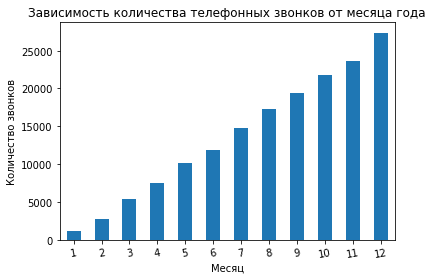

In [22]:
calls.groupby('month')['duration'].count().plot(x="month", y="count", kind="bar", rot=10, fontsize=10)
plt.title('Зависимость количества телефонных звонков от месяца года')
plt.xlabel("Месяц")
plt.ylabel("Количество звонков")

Text(0, 0.5, 'Длительность звонков')

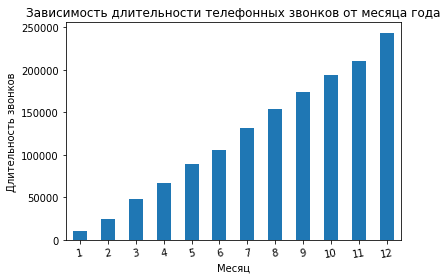

In [23]:
calls.groupby('month')['duration'].sum().plot(x="month", y="count", kind="bar", rot=10, fontsize=10)
plt.title('Зависимость длительности телефонных звонков от месяца года')
plt.xlabel("Месяц")
plt.ylabel("Длительность звонков")

Наблюдаем интересную зависимость. Количество звонков и длительность телефонных разговоров возрастает к концу года. Сделаю предположение, что количество абонентов растет и это влияет на количество звонков.

* количество отправленных сообщений по месяцам

In [24]:
messages_group=messages.pivot_table(index=['month', 'user_id'],values='id',aggfunc=('count'))
messages_group

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

Text(0, 0.5, 'Количество сообщений')

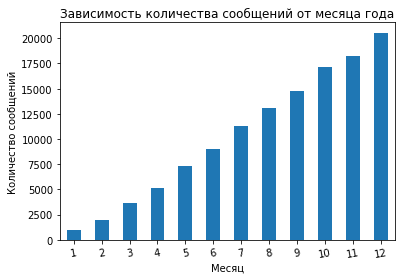

In [25]:
messages.groupby('month')['user_id'].count().plot(x="month", y="sum", kind="bar", rot=10, fontsize=10)
plt.title('Зависимость количества сообщений от месяца года')
plt.xlabel("Месяц")
plt.ylabel("Количество сообщений")

Картина не изменяется, количество смс возрастает к приближению Нового года.

* объем израсходованного интернет-трафика по месяцам

In [26]:
internet_group=internet.pivot_table(index=['month', 'user_id'],values='mb_used',aggfunc=('sum'))
internet_group

mb_used
month user_id         
1     1005        2730
      1032       24147
      1045        2348
      1055       17111
      1071       15622
...                ...
12    1494       17645
      1495       23450
      1496       20757
      1497       19940
      1499       13077

[3201 rows x 1 columns]

Text(0, 0.5, 'Количество интернет трафика')

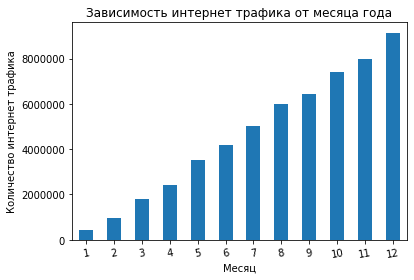

In [27]:
internet.groupby('month')['mb_used'].sum().plot(x="month", y="sum", kind="bar", rot=10, fontsize=10)
plt.title('Зависимость интернет трафика от месяца года')
plt.xlabel("Месяц")
plt.ylabel("Количество интернет трафика")

И здесь тоже самое. Трафик растет от месяца к месяцу.

Text(0, 0.5, 'Количество')

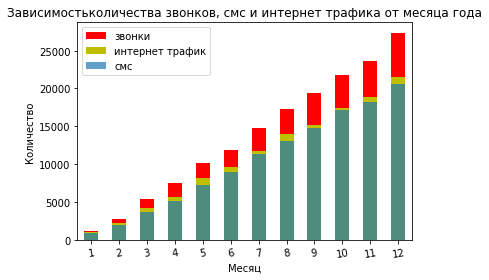

In [28]:
calls.groupby('month')['duration'].count().plot(x="month", y="count", kind="bar", rot=10, fontsize=10, color='r')
internet.groupby('month')['mb_used'].count().plot(x="month", y="count", kind="bar", rot=10, fontsize=10, color='y')
messages.groupby('month')['user_id'].count().plot(x="month", y="count", kind="bar", rot=10, fontsize=10, alpha=0.7)
plt.title('Зависимостьколичества звонков, смс и интернет трафика от месяца года')
plt.legend(['звонки', 'интернет трафик',  'смс'])
plt.xlabel("Месяц")
plt.ylabel("Количество")

Зависимости звонков, смс и трафик интернета от месяца года повторяют друг друга.

Создадим новую сводную таблицу, в которой графами будут:
- User_id -  уникальный идентификатор пользователя
- month	- месяц
- call_number - количество звонков	
- call - длительность звонков
- sms_number - количество смс	
- internet_MB - объём потраченного за сессию интернет-трафика (в мегабайтах)
- tariff - тариф 
- city - город
- city_Moscow - если город Москва - "1", другой город - "0"
- region - если регион - "1",  город Москва - "0"

In [29]:
user_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
#user_calls
user_messages = messages.groupby(['user_id', 'month'])['id'].agg(['count'])
#user_messages
user_internet = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum'])
#user_internet
data_all =pd.merge((pd.merge(user_calls, user_messages, on = ['user_id', 'month'], how='outer')), user_internet, on = ['user_id', 'month'], how='outer')
data_all = data_all.reset_index()# метод для сброса индекса фрейма данных
data_all =  data_all.merge(users[['user_id','tariff']], on =  'user_id')
data_all = data_all.merge(users[['user_id','city']], on = 'user_id')
data_all.columns =  ['User_id','month', 'call_number', 'call', 'sms_number', 'internet_MB', 'tariff', 'city']
data_all['city_Moscow'] = np.where(data_all['city']=='Москва', '1', '0').astype('int32')
data_all['region'] = np.where(data_all['city']!='Москва', '1', '0').astype('int32')
data_all

,User_id,month,call_number,call,sms_number,internet_MB,tariff,city,city_Moscow,region
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,0,1
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,0,1
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,0,1
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,0,1
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,0,1
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11066.0,smart,Санкт-Петербург,0,1
3210,1489,9,NaN,NaN,32.0,17232.0,smart,Санкт-Петербург,0,1
3211,1489,10,NaN,NaN,21.0,19588.0,smart,Санкт-Петербург,0,1
3212,1489,11,NaN,NaN,20.0,17516.0,smart,Санкт-Петербург,0,1


In [30]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 10 columns):
User_id        3214 non-null int64
month          3214 non-null int64
call_number    3168 non-null float64
call           3168 non-null float64
sms_number     2717 non-null float64
internet_MB    3201 non-null float64
tariff         3214 non-null object
city           3214 non-null object
city_Moscow    3214 non-null int32
region         3214 non-null int32
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 251.1+ KB


В сводной таблице имеются пропуски. Посмотрим как соотносятся нули в этих столбцах

In [31]:
data_all.loc[(data_all['sms_number'].isnull()) & (data_all['call_number'].isnull())]

,User_id,month,call_number,call,sms_number,internet_MB,tariff,city,city_Moscow,region
1503,1240,2,NaN,NaN,NaN,961.0,ultra,Воронеж,0,1
3039,1476,4,NaN,NaN,NaN,531.0,ultra,Москва,1,0


In [32]:
data_all.loc[(data_all['internet_MB'].isnull()) & (data_all['call_number'].isnull()) & (data_all['sms_number'].isnull())]

,User_id,month,call_number,call,sms_number,internet_MB,tariff,city,city_Moscow,region


Людей, которые не используют телефон для смс, звоноков и выхода в интернет не выявлено. Следовательно, просто эти абоненты просто не пользуются одним из видов связью. Предположу, что есть категория абонентов, которые используют тариф только для выхода в интернет или только для звонков и отправления смс. Поставим на месте пропусков нули.

In [33]:
data_all = data_all.fillna(0)

In [34]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 10 columns):
User_id        3214 non-null int64
month          3214 non-null int64
call_number    3214 non-null float64
call           3214 non-null float64
sms_number     3214 non-null float64
internet_MB    3214 non-null float64
tariff         3214 non-null object
city           3214 non-null object
city_Moscow    3214 non-null int32
region         3214 non-null int32
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 251.1+ KB


Проверим есть ли дупликаты

In [35]:
data_all.duplicated().sum()

0

Добавам в data_all новый столбец month_pay, в котором отразим стоимость абонентской платы в месяц в зависимости от тарифа.

In [36]:
data_all['month_pay'] =  np.where(data_all['tariff']=='ultra', tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_monthly_fee'],  tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_monthly_fee'])

In [37]:
data_all.head(10)

,User_id,month,call_number,call,sms_number,internet_MB,tariff,city,city_Moscow,region,month_pay
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,0,1,1950
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,0,1,1950
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,0,1,1950
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,0,1,1950
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,0,1,1950
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,0,1,1950
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,0,1,1950
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,0,1,1950
8,1001,11,45.0,430.0,0.0,18452.0,smart,Москва,1,0,550
9,1001,12,47.0,414.0,0.0,14053.0,smart,Москва,1,0,550


Напишем функции, которые будут расчитывать и формировать новые столбцы  call_plus, sms_plus, internet_plus - в них будет отображаться информация - есть ли перерасход при использовании того или иного тарифа и сколько нужно доплатить.

In [38]:
def calls_plus(row):
    if row['tariff'] == 'ultra':
        row['call_plus'] = row['call']-tariffs.loc[tariffs['tariff_name'] == 'ultra', 'minutes_included']
        result = row['call_plus'] * tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_minute']
        return np.where(result > 0, result, 0)
    
    else:
        row['call_plus'] = row['call']-tariffs.loc[tariffs['tariff_name'] == 'smart', 'minutes_included']
        result = row['call_plus'] * tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_minute']
        return np.where(result > 0, result, 0)
    
def message_plus(row):
    if row['tariff'] == 'ultra':
        row['sms_plus'] = row['sms_number']-tariffs.loc[tariffs['tariff_name'] == 'ultra', 'messages_included']
        result = row['sms_plus'] * tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_message']
        return np.where(result > 0, result, 0)
    
    else:
        row['sms_plus'] = row['sms_number']-tariffs.loc[tariffs['tariff_name'] == 'smart', 'messages_included']
        result = row['sms_plus'] * tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_message']
        return np.where(result > 0, result, 0) 
    
def internet_plus(row):
    if row['tariff'] == 'ultra':
        row['internet_plus'] = np. ceil((row['internet_MB']-tariffs.loc[tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'])/1024)
        result = row['internet_plus'] * tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_gb']
        return np.where(result > 0, result, 0)
    
    else:
        row['internet_plus'] = np. ceil((row['internet_MB']-tariffs.loc[tariffs['tariff_name'] == 'smart', 'mb_per_month_included'])/1024)
        result = row['internet_plus'] * tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_gb']
        return np.where(result > 0, result, 0) 
        

Округлим полученные значения и поменяем тип данных на целочисленный.

In [39]:
data_all['call_plus'] = np. ceil(data_all.apply(calls_plus, axis=1)).astype('int32')
data_all['sms_plus'] = np.ceil(data_all.apply(message_plus, axis=1)).astype('int32')
data_all['internet_plus'] = np.ceil(data_all.apply(internet_plus, axis=1)).astype('int32')

В новом  pay_plus будет хранится информация о суммарной доплате за перерасход по телефонным разговорам, смс и интернет трафику.
all_pay - содержит информацию по оплате за пользование услугами оператора "Мегафон", состоящую из суммы оплаты по тарифу и дополнительной оплаты за перерасход.

In [40]:
data_all['pay_plus'] = data_all['call_plus'] + data_all['sms_plus']  + data_all['internet_plus'] 
data_all['all_pay'] =  data_all['month_pay'] + data_all['call_plus'] + data_all['sms_plus']  + data_all['internet_plus'] 
data_all.tail(10)

,User_id,month,call_number,call,sms_number,internet_MB,tariff,city,city_Moscow,region,month_pay,call_plus,sms_plus,internet_plus,pay_plus,all_pay
3204,1473,8,0.0,0.0,17.0,12917.0,ultra,Красноярск,0,1,1950,0,0,0,0,1950
3205,1473,9,0.0,0.0,19.0,17307.0,ultra,Красноярск,0,1,1950,0,0,0,0,1950
3206,1473,10,0.0,0.0,20.0,13703.0,ultra,Красноярск,0,1,1950,0,0,0,0,1950
3207,1473,11,0.0,0.0,14.0,21692.0,ultra,Красноярск,0,1,1950,0,0,0,0,1950
3208,1473,12,0.0,0.0,20.0,18432.0,ultra,Красноярск,0,1,1950,0,0,0,0,1950
3209,1489,8,0.0,0.0,17.0,11066.0,smart,Санкт-Петербург,0,1,550,0,0,0,0,550
3210,1489,9,0.0,0.0,32.0,17232.0,smart,Санкт-Петербург,0,1,550,0,0,400,400,950
3211,1489,10,0.0,0.0,21.0,19588.0,smart,Санкт-Петербург,0,1,550,0,0,1000,1000,1550
3212,1489,11,0.0,0.0,20.0,17516.0,smart,Санкт-Петербург,0,1,550,0,0,600,600,1150
3213,1489,12,0.0,0.0,35.0,17341.0,smart,Санкт-Петербург,0,1,550,0,0,400,400,950


In [41]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
User_id          3214 non-null int64
month            3214 non-null int64
call_number      3214 non-null float64
call             3214 non-null float64
sms_number       3214 non-null float64
internet_MB      3214 non-null float64
tariff           3214 non-null object
city             3214 non-null object
city_Moscow      3214 non-null int32
region           3214 non-null int32
month_pay        3214 non-null int64
call_plus        3214 non-null int32
sms_plus         3214 non-null int32
internet_plus    3214 non-null int32
pay_plus         3214 non-null int32
all_pay          3214 non-null int64
dtypes: float64(4), int32(6), int64(4), object(2)
memory usage: 351.5+ KB


Создадим две новые таблицы в зависимости от тарифа:
- ultra_all - тариф "Ультра"
- smart_all - тариф "Смарт"

In [42]:
ultra_all =  data_all.query("tariff == 'ultra'")
smart_all =  data_all.query("tariff == 'smart'")

In [43]:
ultra_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 3208
Data columns (total 16 columns):
User_id          985 non-null int64
month            985 non-null int64
call_number      985 non-null float64
call             985 non-null float64
sms_number       985 non-null float64
internet_MB      985 non-null float64
tariff           985 non-null object
city             985 non-null object
city_Moscow      985 non-null int32
region           985 non-null int32
month_pay        985 non-null int64
call_plus        985 non-null int32
sms_plus         985 non-null int32
internet_plus    985 non-null int32
pay_plus         985 non-null int32
all_pay          985 non-null int64
dtypes: float64(4), int32(6), int64(4), object(2)
memory usage: 107.7+ KB


In [44]:
smart_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 8 to 3213
Data columns (total 16 columns):
User_id          2229 non-null int64
month            2229 non-null int64
call_number      2229 non-null float64
call             2229 non-null float64
sms_number       2229 non-null float64
internet_MB      2229 non-null float64
tariff           2229 non-null object
city             2229 non-null object
city_Moscow      2229 non-null int32
region           2229 non-null int32
month_pay        2229 non-null int64
call_plus        2229 non-null int32
sms_plus         2229 non-null int32
internet_plus    2229 non-null int32
pay_plus         2229 non-null int32
all_pay          2229 non-null int64
dtypes: float64(4), int32(6), int64(4), object(2)
memory usage: 243.8+ KB


Напишим функции для строительства гистограмм, область построения будем автоматически отсекать по Q1-3*IQR до Q3+3*IQR.

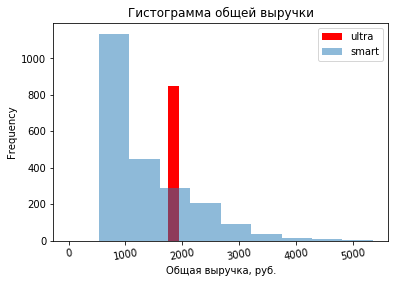

In [45]:
def smart_all_gis(cl):#создаем новую функцию  smart_all_gis(cl)
    q11 = smart_all[cl].quantile(0.25)#которая рассчитывает интервал для построения графиков
    q33 =smart_all[cl].quantile(0.75)
    iqr = q33 - q11
    minn=q11 - (3*iqr)
    maxx=q33 + (3*iqr)
    return minn>=0, maxx

def smart_all_hist(value, mesh, ambit):#создаем новую функцию smart_all_hist(value, mesh, ambit), 
                                                    #которая возвращает гистограмму
    return smart_all[value].plot(kind='hist', y="value", bins=mesh, rot = 10, range = ambit, label = 'smart', alpha=0.5)


def ultra_all_gis(col):#создаем новую функцию  ultra_all_gis(col)
    q1 = ultra_all[col].quantile(0.25)#которая рассчитывает интервал для построения графиков
    q3 = ultra_all[col].quantile(0.75)
    iqr = q3 - q1
    min_n=q1 - (3*iqr)
    max_x=q3 + (3*iqr)
    return min_n>=0, max_x


def ultra_all_hist(value, mesh, ambit):#создаем новую функцию ultra_all_hist(value, mesh, ambit), 
                                                    #которая возвращает гистограмму
    return ultra_all[value].plot(kind='hist', y="value", bins=mesh, rot = 10,  range = ambit, label = 'ultra', color = 'r')



ultra_all_hist('all_pay', 10, (ultra_all_gis('all_pay')))#вызываем функцию ultra_all_hist(value, mesh, ambit), строим гистограмму
smart_all_hist('all_pay', 10, (smart_all_gis('all_pay')))
plt.title('Гистограмма общей выручки')
plt.xlabel("Общая выручка, руб.")
plt.legend()
plt.show()

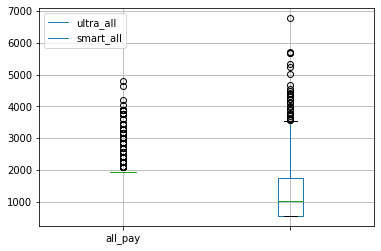

In [46]:
ultra_all.boxplot(column=['all_pay'], patch_artist=True,  positions=[1])#Посмотрим методом boxplot() диаграмму размаха для двух дат фреймов.
smart_all.boxplot(column=['all_pay'],  positions=[2])
plt.legend([ 'ultra_all', 'smart_all'])
plt.show()

Для пользователей тарифа "Ультра" достаточно пакета предоставляемого в рамках тарифа, для пользователей тарифа "Смарт" пакета не хватает.

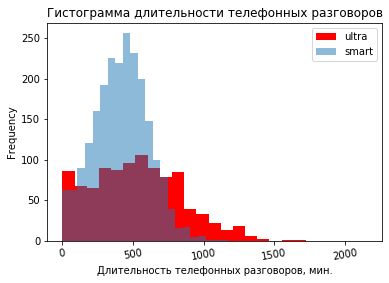

In [47]:
ultra_all_hist('call', 25, (ultra_all_gis('call')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
smart_all_hist('call', 25, (smart_all_gis('call')))
plt.title('Гистограмма длительности телефонных разговоров')
plt.xlabel("Длительность телефонных разговоров, мин.")
plt.legend()
plt.show()

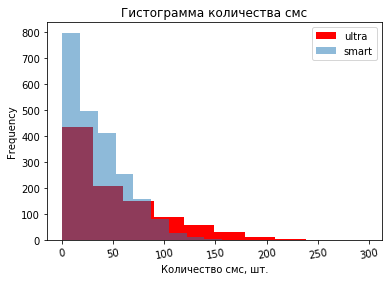

In [48]:
ultra_all_hist('sms_number', 10, (ultra_all_gis('sms_number')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
smart_all_hist('sms_number', 10, (smart_all_gis('sms_number')))
plt.title('Гистограмма количества смс')
plt.xlabel("Количество смс, шт.")
plt.legend()
plt.show()

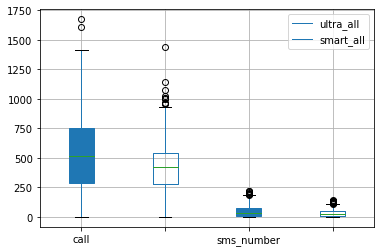

In [49]:
ultra_all.boxplot(column=['call', 'sms_number'], patch_artist=True,  positions=[1,3])
smart_all.boxplot(column=['call', 'sms_number'],  positions=[2,4])
plt.legend([ 'ultra_all', 'smart_all'])
plt.show()

Абоненты тарифа "Ультра" не экономят минуты, говорят если нужно долго. Для тарифа "Смарт" -  стараются не выходит за предоставленные пакетом минуты.

Тариф "Смарт" - деньги все считают, поэтому количество смс, выходящие за предел предоставляемые пакетом резко падает. Тариф "Ультра" - выбирает не все входящие в пакет смс.

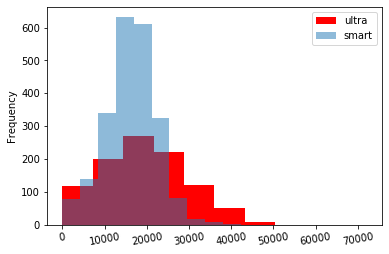

In [50]:
ultra_all_hist('internet_MB', 10, (ultra_all_gis('internet_MB')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
smart_all_hist('internet_MB', 10, (smart_all_gis('internet_MB')))

plt.legend()
plt.show()

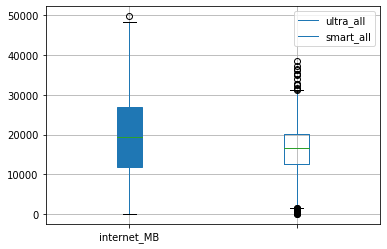

In [51]:
ultra_all.boxplot(column=['internet_MB'], patch_artist=True,  positions=[1])
smart_all.boxplot(column=['internet_MB'],  positions=[2])
plt.legend([ 'ultra_all', 'smart_all'])
plt.show()

В обоих тарифах предоставляемого трафика не хватает. И там и там берут дополнительные мегабайты.

## Описание поведения клиента на основе полученной выборки

In [52]:
print('Количество пользователей ultra: {}'.format(len(ultra_all.groupby('User_id'))))

Количество пользователей ultra: 148


In [53]:
print('Количество пользователей ultra: {}'.format(len(smart_all.groupby('User_id'))))

Количество пользователей ultra: 350


Количество пользователей тарифа "Смарт" почти в два с половиной раза больше, чем пользователь тарифом "Ультра" 

In [54]:
ultra_group=ultra_all.pivot_table(index=['month'],values=['internet_MB', 'call', 'sms_number', 'all_pay', 'pay_plus', 'city_Moscow', 'region'],aggfunc=('sum'))
#Группируем таблицу ultra_all_good по месяцам и результат сохраняем в ultra_group
ultra_group

ultra_group['count_user']=ultra_group['city_Moscow']+ultra_group['region']#количество пользователей по месяцам
ultra_group['all_pay_mean'] = ((ultra_group['all_pay'] / ultra_group['count_user'] ).round(1)).astype('int32')#средний чек в месяц
ultra_group = ultra_group.reset_index()
ultra_group

,month,all_pay,call,city_Moscow,internet_MB,pay_plus,region,sms_number,count_user,all_pay_mean
0,1,17550,3853.0,4,118382.0,0,5,304.0,9,1950
1,2,47400,7131.0,5,282887.0,600,19,527.0,24,1975
2,3,74550,18117.0,9,649423.0,2400,28,1195.0,37,2014
3,4,110100,25191.0,13,926409.0,2850,42,1736.0,55,2001
4,5,138150,34192.0,14,1298540.0,7500,53,2536.0,67,2061
5,6,171450,40295.0,19,1591148.0,7650,65,3505.0,84,2041
6,7,193050,49667.0,20,1866833.0,15600,71,4536.0,91,2121
7,8,222900,54653.0,24,2096565.0,14250,83,5183.0,107,2083
8,9,232800,62036.0,27,2210554.0,8550,88,6013.0,115,2024
9,10,254250,68644.0,29,2467856.0,14400,94,7187.0,123,2067


Методом describeсделаем подсчет среднего количества и стандартного отклонения для даты фрейма ultra_group

In [55]:
ultra_group.describe()

,month,all_pay,call,city_Moscow,internet_MB,pay_plus,region,sms_number,count_user,all_pay_mean
count,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,170000.000000,43227.000000,18.750000,1.599550e+06,9937.500000,63.333333,4051.916667,82.083333,2047.333333
std,3.605551,92821.507598,26050.944558,9.705903,9.526800e+05,8138.324738,34.158277,2838.549036,43.802155,57.308310
min,1.000000,17550.000000,3853.000000,4.000000,1.183820e+05,0.000000,5.000000,304.000000,9.000000,1950.000000
25%,3.750000,101212.500000,23422.500000,12.000000,8.571625e+05,2737.500000,38.500000,1600.750000,50.500000,2010.750000
50%,6.500000,182250.000000,44981.000000,19.500000,1.728990e+06,8100.000000,68.000000,4020.500000,87.500000,2051.000000
75%,9.250000,238162.500000,63688.000000,27.500000,2.274880e+06,14700.000000,89.500000,6306.500000,117.000000,2085.500000
max,12.000000,297300.000000,82400.000000,31.000000,3.032089e+06,26250.000000,109.000000,8425.000000,139.000000,2138.000000


Напишем функцию для подсчета дисперсии и расчитаем ее для дата фрейма ultra_group.

In [56]:
def variant(row):
    variance_row = np.var( ultra_group[row], ddof=1)#известно, что датасет выборка, поэтому указываем параметр ddof=1
    print('Дисперсия', row, ':', variance_row) 

variant('all_pay')
variant('call')
variant('internet_MB')
variant('pay_plus')
variant('sms_number')
variant('all_pay_mean')

Дисперсия all_pay : 8615832272.727272
Дисперсия call : 678651712.3636364
Дисперсия internet_MB : 907599123548.8788
Дисперсия pay_plus : 66232329.54545455
Дисперсия sms_number : 8057360.628787881
Дисперсия all_pay_mean : 3284.2424242424245


Проделаем тоже самое с smart_group.

In [57]:
smart_group=smart_all.pivot_table(index=['month'],values=['internet_MB', 'call', 'sms_number', 'all_pay', 'pay_plus', 'city_Moscow', 'region'],aggfunc=('sum'))
#Группируем таблицу smart_all_good по месяцам и результат сохраняем в smart_group
smart_group
#smart_group['internet, Мб'].plot(y='internet, Мб',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra')

smart_group['count_user']=smart_group['city_Moscow']+smart_group['region']#количество пользователей по месяцам
smart_group['all_pay_mean'] = ((smart_group['all_pay'] / smart_group['count_user']).round(1)).astype('int32')#средний чек в месяц
#data_ll=data_all.query('tariff=="smart" and all_pay>550').count()
smart_group = smart_group.reset_index()
smart_group

,month,all_pay,call,city_Moscow,internet_MB,pay_plus,region,sms_number,count_user,all_pay_mean
0,1,24525,6931.0,4,289831.0,5825,30,620.0,34,721
1,2,48001,17324.0,9,673461.0,16101,49,1397.0,58,827
2,3,89676,30034.0,11,1164537.0,47326,66,2453.0,77,1164
3,4,107866,41119.0,16,1509702.0,46266,96,3443.0,112,963
4,5,169849,54618.0,25,2231353.0,92299,116,4762.0,141,1204
5,6,198259,64885.0,28,2593622.0,108059,136,5478.0,164,1208
6,7,247014,82079.0,36,3168466.0,136464,165,6784.0,201,1228
7,8,312340,99045.0,38,3908561.0,183090,197,7905.0,235,1329
8,9,326386,111439.0,41,4244377.0,183386,219,8746.0,260,1255
9,10,402667,125284.0,52,4932898.0,240967,242,9927.0,294,1369


In [58]:
smart_group.describe()

,month,all_pay,call,city_Moscow,internet_MB,pay_plus,region,sms_number,count_user,all_pay_mean
count,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,240479.250000,77631.416667,32.166667,3.014572e+06,138316.750000,153.583333,6201.083333,185.750000,1183.083333
std,3.605551,162313.291896,49912.744923,20.332837,1.917106e+06,106066.395367,83.832580,3790.989687,103.931905,241.062971
min,1.000000,24525.000000,6931.000000,4.000000,2.898310e+05,5825.000000,30.000000,620.000000,34.000000,721.000000
25%,3.750000,103318.500000,38347.750000,14.750000,1.423411e+06,47061.000000,88.500000,3195.500000,103.250000,1113.750000
50%,6.500000,222636.500000,73482.000000,32.000000,2.881044e+06,122261.500000,150.500000,6131.000000,182.500000,1218.000000
75%,9.250000,345456.250000,114900.250000,43.750000,4.416507e+06,197781.250000,224.750000,9041.250000,268.500000,1333.500000
max,12.000000,533365.000000,161275.000000,66.000000,6.112113e+06,348015.000000,271.000000,12130.000000,337.000000,1582.000000


In [59]:
def var_row(row):
    varian_row = np.var(smart_group[row], ddof=1)#известно, что датасет выборка, поэтому указывают параметр ddof=1
    print('Дисперсия', row, ':', varian_row) 

var_row('all_pay')
var_row('call')
var_row('internet_MB')
var_row('pay_plus')
var_row('sms_number')
var_row('all_pay_mean')

Дисперсия all_pay : 26345604726.204544
Дисперсия call : 2491282105.7196965
Дисперсия internet_MB : 3675294547977.2954
Дисперсия pay_plus : 11250080226.204546
Дисперсия sms_number : 14371602.81060606
Дисперсия all_pay_mean : 58111.35606060607


Напишем функцию для построения графиков зависимостей количества абонентов оператора "Мегафон", выручки, длятельности разговора по телефону, количества смс, расходование интернет трафика, в течение года.

In [60]:
def ultra_bar(point1, point2):
    return ultra_group.plot(x=point1, y=point2, kind='bar', ax=ax, figsize=(10,5),  label = 'ultra')
    
    
def smart_bar(point11, point22):
    return smart_group.plot(x=point11, y=point22, kind='bar', ax=ax, figsize=(10,5), color='y', label = 'smart', alpha=0.5 )

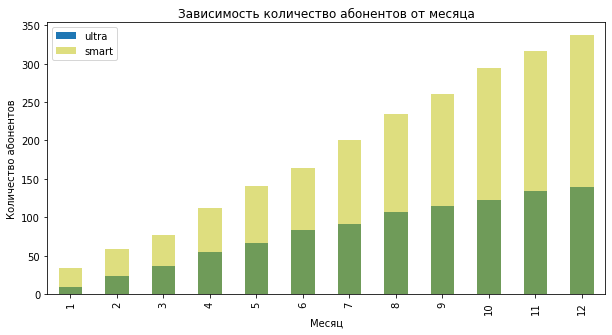

In [61]:
ax = plt.gca()
ultra_bar('month', 'count_user')
smart_bar('month', 'count_user')
plt.title('Зависимость количество абонентов от месяца')
plt.xlabel("Месяц")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Вот и подтверждение нашего допущения, что количесво пользователей, в течение года возрастает. Для тарифа "Смарт" это более ярко выражено. Людей привлекает недорогой, практичный тариф.

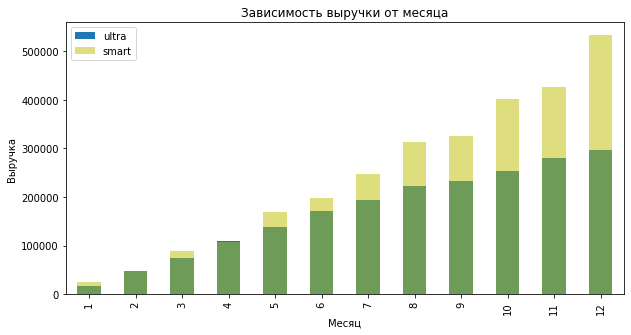

Коэффициент корреляции числа абонентов и выручки для тарифа "смарт": 0.9895776988829807
Коэффициент корреляции числа абонентов и выручки для тарифа: "ультра": 0.9992833145477678


In [62]:
ax = plt.gca()
ultra_bar('month', 'all_pay')
smart_bar('month', 'all_pay')
plt.title('Зависимость выручки от месяца')
plt.xlabel("Месяц")
plt.ylabel("Выручка")
plt.legend()
plt.show()
print('Коэффициент корреляции числа абонентов и выручки для тарифа "смарт":', smart_group['all_pay'].corr(smart_group['count_user']))
print('Коэффициент корреляции числа абонентов и выручки для тарифа: "ультра":',ultra_group['all_pay'].corr(ultra_group['count_user']))

Количество абонентов растет и выручка растет) Коэффициент корреляции только подтверждает нашу догатку, почти едининца.

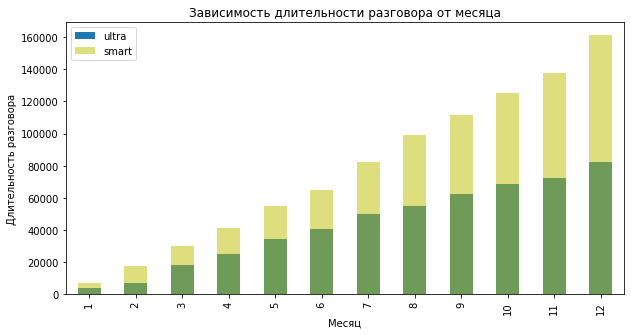

Коэффициент корреляции числа абонентов и длительности разговорадля тарифа "смарт": 0.9963569583228853
Коэффициент корреляции числа абонентов и длительности разговора для тарифа: "ультра": 0.9941277197118302


In [63]:
ax = plt.gca()
ultra_bar('month', 'call')
smart_bar('month', 'call')
plt.title('Зависимость длительности разговора от месяца')
plt.xlabel("Месяц")
plt.ylabel("Длительность разговора")
plt.legend()
plt.show()
print('Коэффициент корреляции числа абонентов и длительности разговорадля тарифа "смарт":', smart_group['call'].corr(smart_group['count_user']))
print('Коэффициент корреляции числа абонентов и длительности разговора для тарифа: "ультра":',ultra_group['call'].corr(ultra_group['count_user']))

Зависимость от количества пользователей сохраняется для обоих тарифов.

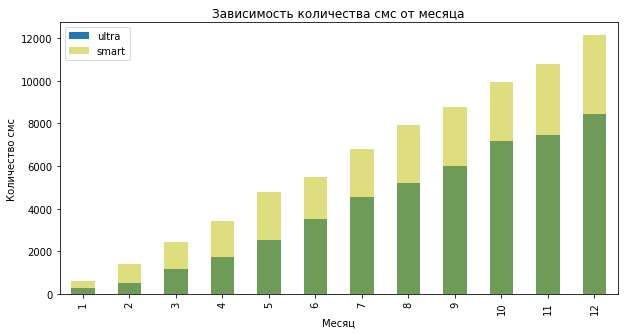

Коэффициент корреляции числа абонентов и длительности разговорадля тарифа "смарт": 0.9963569583228853
Коэффициент корреляции числа абонентов и длительности разговора для тарифа: "ультра": 0.9941277197118302


In [64]:
ax = plt.gca()
ultra_bar('month', 'sms_number')
smart_bar('month', 'sms_number')
plt.title('Зависимость количества смс от месяца')
plt.xlabel("Месяц")
plt.ylabel("Количество смс")
plt.legend()
plt.show()
print('Коэффициент корреляции числа абонентов и длительности разговорадля тарифа "смарт":', smart_group['call'].corr(smart_group['count_user']))
print('Коэффициент корреляции числа абонентов и длительности разговора для тарифа: "ультра":',ultra_group['call'].corr(ultra_group['count_user']))

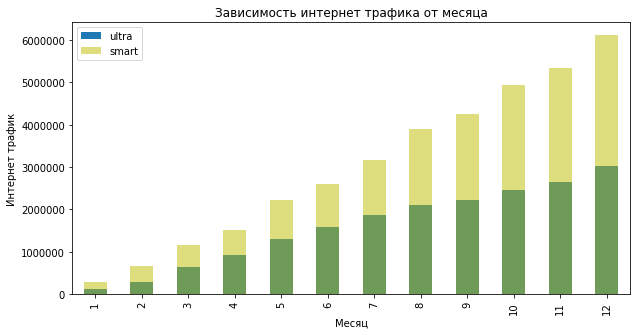

Коэффициент корреляции числа абонентов и длительности разговорадля тарифа "смарт": 0.997588647552626
Коэффициент корреляции числа абонентов и длительности разговора для тарифа: "ультра": 0.9955839765006022


In [65]:
ax = plt.gca()
ultra_bar('month', 'internet_MB')
smart_bar('month', 'internet_MB')
plt.title('Зависимость интернет трафика от месяца')
plt.xlabel("Месяц")
plt.ylabel("Интернет трафик")
plt.legend()
plt.show()
print('Коэффициент корреляции числа абонентов и длительности разговорадля тарифа "смарт":', smart_group['internet_MB'].corr(smart_group['count_user']))
print('Коэффициент корреляции числа абонентов и длительности разговора для тарифа: "ультра":',ultra_group['internet_MB'].corr(ultra_group['count_user']))

Количество абонентов играет решающию роль в получение прибыли, в использование трафика, в количестве использованных смс и телефонных разговоров.
Для тарифа "Ультра" эти показатели выше, чем у тарифа "Смарт", в первом больше пакет с объем включенных опций. 

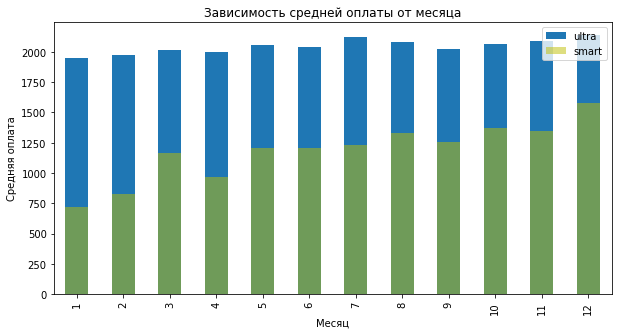

In [66]:
ax = plt.gca()
ultra_bar('month', 'all_pay_mean')
smart_bar('month', 'all_pay_mean')
plt.title('Зависимость средней оплаты от месяца')
plt.xlabel("Месяц")
plt.ylabel("Средняя оплата")
plt.legend()
plt.show()

Если посмотреть на график, то средний чек для тарифа "Ультра" выше, чем для тарифа "Смарт". В течение года средний чек изменяется. Увеличим масштаб, чтобы посмотреть повнимательней.

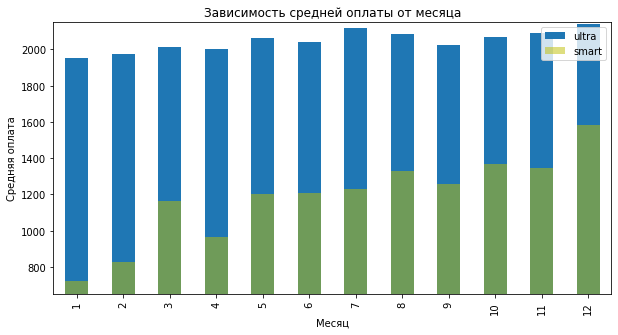

In [67]:
ax = plt.gca()
ultra_bar('month', 'all_pay_mean')
smart_bar('month', 'all_pay_mean')
plt.title('Зависимость средней оплаты от месяца')
plt.xlabel("Месяц")
plt.ylim(650, 2150)
plt.ylabel("Средняя оплата")
plt.legend()
plt.show()

Сейчас хорошо видно, что для тарифа "Смарт" колебания в среднем чеке ярче выражены, чем для тарифа "Ультра". Для тарифа "Смарт" дельта составляет 861 руб - это в 1,5 раза больше ежемесячной платы. В тоже время для тарифа "Ультра", переплата составляет 188 руб - это в 0,09 раза больше ежемесячного платежа.

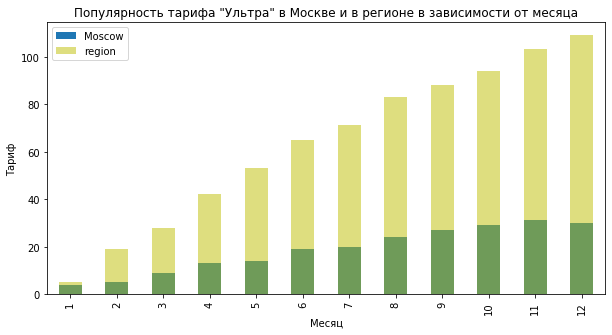

In [68]:
ax = plt.gca()
ultra_bar('month', 'city_Moscow')
ultra_group.plot(x='month', y='region', kind='bar', ax=ax, figsize=(10,5), color='y', alpha=0.5 )
plt.title('Популярность тарифа "Ультра" в Москве и в регионе в зависимости от месяца')
plt.xlabel("Месяц")
plt.ylabel("Тариф")
plt.legend(['Moscow', 'region'])
plt.show()

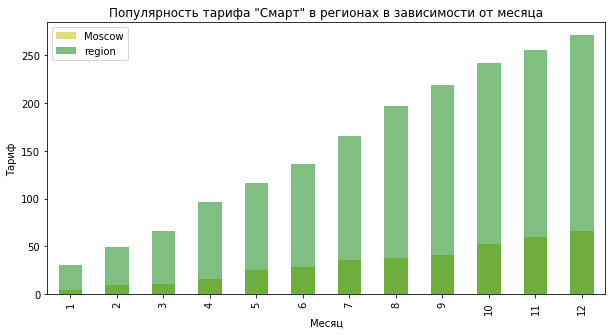

In [69]:
ax = plt.gca()
smart_bar('month', 'city_Moscow')
smart_group.plot(x='month', y='region', kind='bar', ax=ax, figsize=(10,5), color='g', alpha=0.5 )
plt.title('Популярность тарифа "Смарт" в регионах в зависимости от месяца')
plt.xlabel("Месяц")
plt.ylabel("Тариф")
plt.legend(['Moscow', 'region'])
plt.show()

Тариф "Смарт" пользуется популярностью и в Москве и в регионах. Проверим отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов. 

##  Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

In [70]:
print('средняя выручка пользователей тарифов «Ультра»: {}'.format(ultra_all['all_pay'].mean()))

средняя выручка пользователей тарифов «Ультра»: 2071.0659898477156


In [71]:
print('средняя выручка пользователей тарифов «Ультра»: {}'.format(smart_all['all_pay'].mean()))

средняя выручка пользователей тарифов «Ультра»: 1294.6393001345896


Зная среднюю выручку пользователь разных тарифных планов, можно сформулировать гипотезы.
Нулевая гипотеза H₀: 
- Средняя выручка пользователей тарифов "Ультра" и "Смарт" НЕ различается.
Исходя из H₀ формулируется альтернативная гипотеза H₁: 
- Средняя выручка пользователей тарифов "Ультра" и "Смарт"  различается.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [72]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу


results = st.ttest_ind(ultra_all['all_pay'], smart_all['all_pay'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Нуливая гипотеза не подтвердилась. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается, что видно из ежемесячного платежа за тариф и расчетов средней выручки по тарифам. Так же можно сказать, что абоненты выходят за рамки тарифного плана, но в тарифе "Ультра" это выражено несильно, по сравнению с тарифом "Смарт". 

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [73]:
city_moscow= data_all.query('city == "Москва"')
city_region = data_all.query('city != "Москва"')

In [74]:
print('средняя выручка пользователей в Москве: {}'.format(city_moscow['all_pay'].mean()))

средняя выручка пользователей в Москве: 1550.8052373158755


In [75]:
print('средняя выручка пользователей в регионах: {}'.format(city_region['all_pay'].mean()))

средняя выручка пользователей в регионах: 1528.3169419900116


Расчитав среднюю выручку абонентов в г.Москве и регионах, сформулируем гипотезы.
Нулевая гипотеза H₀:

- средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов. Исходя из H₀ формулируется альтернативная гипотеза H₁:
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [76]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(city_moscow['all_pay'], city_region['all_pay'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Нуливая гипотеза не отвергнута . Средняя выручка пользователей из Москвы практически не отличается от выручки пользователей из других регионов, что видно из расчетов средней выручки по Москве и регионам. Разница между средней выручкой разных тарифов составляет 1,4%.

## Общий вывод
<a id="output"></a>

1. Обработав полученный архив и 5 дата фреймов, было проведено исследование полученных данных, обработаны пропущенные значения где это требовалось, заменены типы данных.
2. В таблицы были добавлены: новые столбцы с месяцами.
3. Выявлены нуливые значения в длительности разговоров по телефону и интернет трафика. Сделано предположение, что это не состоявшиеся разговоры и выход в интернет без потраченного объема интернет-трафика за сессию. Нули убирали из рассмотрения.
4. Выявлены NaN в churn_date, но по условию это значит, что  тариф ещё действует на момент выгрузки данных, поэтому оставили как есть.
5.  Постоены гисторгаммы и боксплоты.
6. Сформированы и очищены таблицы ultra_all, smart_all  от выбросов.
7. Для каждого пользователя посчитано и построены зависимости:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
8. Пользователи тарифа "Смарт" стараются не выходить за предоставленный лимит в телефонных разговорах, смс и интернет-трафика. Абоненты "Ультра" чувствуют себя более свободными, благодаря рассширеному пакету и не всегда выбирают его.
9. С приближением Нового года количество минут разговора, сообщений и объём интернет-трафика возрастает

| Тариф        | количество минут разговора       | количество смс  |     интернет-трафика    |   .                         |  
|:------------------:|:----------------------------------:|: ------------------------------:|:---------------:|:-----------------------:|
|                      |        43227                                    |                 4051                   |      1599550             |        среднее                         |                      
|          "Ультра"             |  26050                                 |      2838                |       952682               |                      стандартное отклонение               |              
|             |  678651712 | 8057360 | 907599123548     | дисперсия  | 
|    | 77631      | 6201   | 3014572   | среднее  | 
|  "Смарт"  | 49912    |    3790 |1917106   |      стандартное отклонение   | 
|    | 2491282105     |   14371602  | 3675294547977   |  дисперсия| 

10. Проверены гипотезы
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается;
    - средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов;


| Тариф        | средняя выручка       | Нуливая гипотеза  |  
|:------------------:|:----------------------------------:|: ------------------------------:|
|              "Ультра"          |        2071.0              |         Отвергаем нулевую гипотезу                 |                       
|           "Смарт"            |  1294.1                       |                |                
|       |    |    |   | 
| Москва  |   1550 |Не получилось отвергнуть нулевую гипотезу  |  
|  регионы  | 1528     |     | 

## Чек-лист готовности проекта
<a id="list"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  приведены данные к нужным типам
- [x]  найдены и исправены ошибки в данных
- [x]  есть пояснение, какие ошибки были найдены и как их исправили
- [x]   посчитано для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитано для каждого пользователя количество отправленных сообщений по месяцам
- [x]  посчитано для каждого пользователя помесячная выручка с каждого пользователя
- [x]  описано поведение клиентов оператора, исходя из выборки
- [x]  посчитано среднее количество, дисперсию и стандартное отклонение
- [x]  построены гистограммы
- [x]  описаны распределения
- [x]  провеены гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- [x]  провеены гипотезы:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
- [x]  cделано пояснение для формулирования нулевой и альтернативной гипотезы
- [x]  cделано пояснение　какой критерий использовали для проверки гипотез и почему
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод